## Bibliotecas e configurações iniciais

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
#import json
import os
import shutil
import pickle

In [2]:
num_nucleos = os.cpu_count()

print(f"Número de núcleos disponíveis: {num_nucleos}")

Número de núcleos disponíveis: 16


In [3]:
os.environ['LOKY_MAX_CPU_COUNT'] = '8'  # Substitua '4' pelo número desejado de núcleos

# Funções utilizadas

In [5]:
#Retorna N imagens amostrais
def fnc_reto_amos_imag(quantidade,path):
    n = quantidade
    #Parametro das imagens
    fig, axes = plt.subplots(1, n, figsize=(20,10))
    images_dir = path
    for i in range(n):
        #Escolhe imagens aleatorias no caminho especificado
        random_image = random.choice(os.listdir(os.path.join(images_dir)))
        #Grava qual imagem será demostrada em uma variavel
        random_image_file = os.path.join(images_dir,random_image)
        #Plota a imagem
        image = plt.imread(random_image_file)
        axes[i].imshow(image)
        axes[i].set_title("Artist: " + random_image)
        axes[i].axis('off')

In [6]:
# Função para extrair recursos de uma imagem
def extrai_recurso(image_path):
    image = cv2.imread(image_path)
    image = mpl.image.imread(image_path)
    if image is None:
        print(f"Erro ao carregar a imagem: {image_path}")
        return None
    # Transforma a imagem em uma matriz 1D
    image = image.reshape(-1, 3)
    return image

In [7]:
# Converte os valores RGB para o formato hexadecimal
def paleta_cores(paleta):
    palette_hex = ['#%02x%02x%02x' % (r, g, b) for (r, g, b) in paleta]
    # Exibe a paleta de cores
    print("Paleta de Cores (Hex):", palette_hex)    
    # Plota a paleta de cores
    plt.imshow([paleta])
    plt.axis('off')
    plt.show()

In [8]:
def fnc_cria_dataframe(images_dir):
    imagens = os.listdir(images_dir)
    # Lista para armazenar os recursos extraídos de cada imagem
    features_list = []
    # Lista para armazenar os caminhos e IDs das imagens
    image_paths_and_ids = []
    
    for i in imagens:
        # Utiliza a função de extrair os pixels da imagem
        features = extrai_recurso(images_dir + '\\' + i)
        # Verifica se a função extract_features retornou algo
        if features is not None:
            features_list.append(features)
    
    array_combinado = np.concatenate(features_list,axis=0)
    return array_combinado

In [9]:
#Treina modelo e devolve paleta de cores
def treina_modelo_paleta(dados,n_clusters):
    #Treina todos o modelo
    # Número de clusters desejado
    num_clusters = n_clusters
    kmeans  = KMeans(n_clusters=num_clusters, init='k-means++', algorithm='elkan', n_init=1, random_state=42)
    kmeans .fit(dados)
    paleta = kmeans.cluster_centers_.astype(int)
    return kmeans,paleta

In [10]:
#Salva o modelo
def salva_modelo(modelo,nome_modelo):
    caminho = f"C:\\Users\\mavia\\Documents\\ML-PROJECT\\Modelos\\{nome_modelo}.pkl"
    with open(caminho,'wb') as arquivo:
        pickle.dump(modelo,arquivo)

## Amostra de imagens

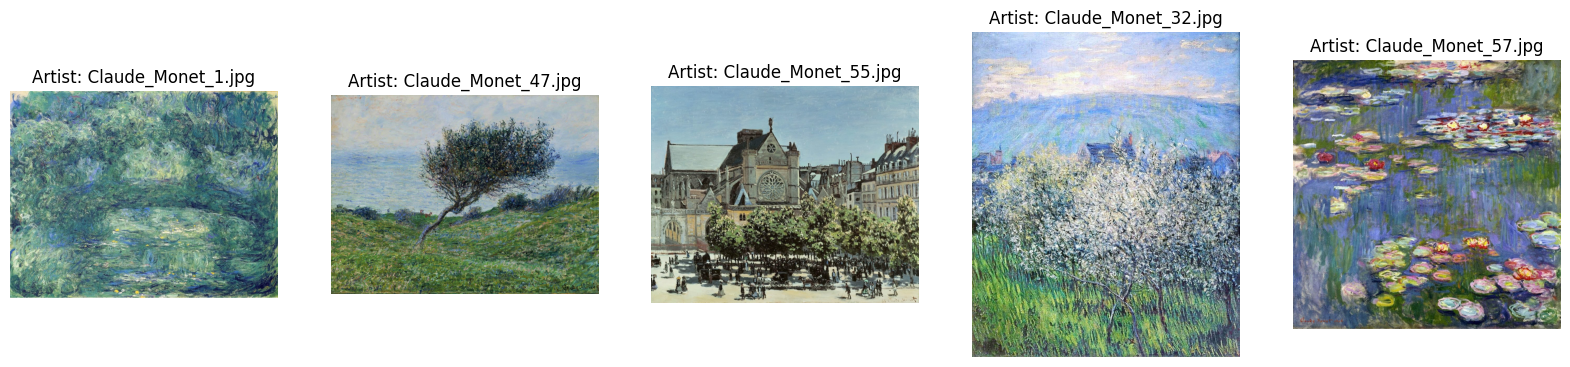

In [5]:
fnc_reto_amos_imag(5,"C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens\\images\\images\\Claude_Monet")

## Dados das obras

In [8]:
df = pd.read_csv('C:\\Users\\mavia\\Documents\\ML-PROJECT\\Dados\\artists_2.csv')
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,3,Claude_Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
1,37,Edvard_Munch,1863 - 1944,Symbolism,Norwegian,Edvard Munch (; Norwegian: [ˈɛdvɑʈ ˈmʊŋk] (lis...,https://en.wikipedia.org/wiki/Edvard_Munch,67
2,39,Eugene_Delacroix,1798 - 1863,Romanticism,French,Ferdinand Victor Eugène Delacroix (; French: [...,https://en.wikipedia.org/wiki/Eugène_Delacroix,31
3,34,Gustave_Courbet,1819 - 1877,Realism,French,Jean Désiré Gustave Courbet (French: [ɡystav k...,https://en.wikipedia.org/wiki/Gustave_Courbet,59
4,15,Pierre-Auguste_Renoir,1841 - 1919,Impressionism,French,"Pierre-Auguste Renoir, commonly known as Augus...",http://en.wikipedia.org/wiki/Pierre-Auguste_Re...,336


In [9]:
generos = list(df.genre.unique())
generos = [genero.replace(' ', '_') for genero in generos]
print(generos)

['Impressionism', 'Symbolism', 'Romanticism', 'Realism', 'Early_Renaissance', 'Post-Impressionism']


In [10]:
df['genre'] = df['genre'].apply(lambda x: x.replace(' ', '_'))

# Organiza os locais das imagens

In [10]:
#Cria um diretório para cada genero existente no dataframe e insere a imagem referente àquele artista
generos = list(df.genre.unique())
#generos = [genero.replace(' ', '_') for genero in generos]
diretorio = "C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens_por_genero"
diretorio_imagens = "C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens\\resized\\resized"
local_do_arquivo = os.path.join(diretorio)
local_das_imagens = os.path.join(diretorio_imagens)
for generos in generos:
    nova_pasta = os.path.join(local_do_arquivo, generos)
    print(nova_pasta)
    if not os.path.exists(nova_pasta):
        os.makedirs(nova_pasta)

C:\Users\mavia\Documents\ML-PROJECT\Imagens_por_genero\Impressionism
C:\Users\mavia\Documents\ML-PROJECT\Imagens_por_genero\Symbolism
C:\Users\mavia\Documents\ML-PROJECT\Imagens_por_genero\Romanticism
C:\Users\mavia\Documents\ML-PROJECT\Imagens_por_genero\Realism
C:\Users\mavia\Documents\ML-PROJECT\Imagens_por_genero\Early Renaissance
C:\Users\mavia\Documents\ML-PROJECT\Imagens_por_genero\Post-Impressionism


## Organiza os artistas em pastas separadas de acordo com o nome contido na imagem

In [18]:
# Diretório onde as imagens estão localizadas
diretorio_origem = "C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens\\resized"

# Lista todos os arquivos no diretório
arquivos = os.listdir(diretorio_origem)

# Loop para cada arquivo
for arquivo in arquivos:
    # Obtem o nome do artista removendo o número e a extensão do arquivo
    nome_artista = os.path.splitext(arquivo)[0].rsplit('_', 1)[0]

    # Cria o caminho para a nova pasta
    nova_pasta = os.path.join(diretorio_origem, nome_artista)

    # Caso não exista, cria a pasta
    if not os.path.exists(nova_pasta):
        os.makedirs(nova_pasta)

    # Construindo o caminho completo para o arquivo de origem e destino
    caminho_origem = os.path.join(diretorio_origem, arquivo)
    caminho_destino = os.path.join(nova_pasta, arquivo)

    # Move o arquivo para a nova pasta
    shutil.move(caminho_origem, caminho_destino)
# Sinaliza o termino da execução
print("Processo concluído!")


Processo concluído!


## Transfere as obras de cada artista para seu genero especifico

In [11]:
diretorio_base = "C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens_por_genero"
diretorio_imagens = "C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens\\resized\\resized"
generos = list(df.genre.unique())
for genero in generos:
    # Criar o diretório para o gênero se não existir
    diretorio_genero = os.path.join(diretorio_base, genero)
    if not os.path.exists(diretorio_genero):
       os.makedirs(diretorio_genero)
    # Iterar sobre as linhas do DataFrame para encontrar artistas do gênero específico
    for index, row in df[df['genre'] == genero].iterrows():
        artista = row['name']
        origem = os.path.join(diretorio_imagens, artista)

        destino = os.path.join(diretorio_genero)

        imagens = os.listdir(origem)

        for imagens in imagens:
            shutil.copy2(origem + "\\" + imagens, destino)


# Modelagem

## Early Renaissance

In [67]:
#Cria o array com os dados das imagens
dados_Early_Renaissance  = fnc_cria_dataframe("C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens_por_genero\\Early Renaissance")

In [68]:
dados_Early_Renaissance.shape

(66979165, 3)

In [69]:
kmeans_Early_Renaissance, paleta_early_renaissance = treina_modelo_paleta(dados_Early_Renaissance,5)

Paleta de Cores (Hex): ['#e2dfd0', '#1b1713', '#b6a380', '#8f6948', '#533f2f']


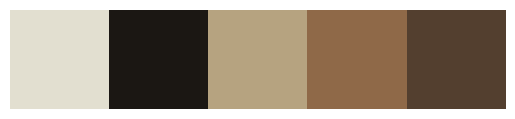

In [70]:
#Exibe a pela de cores treinadas pelo modelo
paleta_cores(paleta_early_renaissance)

In [78]:
#Chama função para salvar o modelo
salva_modelo(kmeans_Early_Renaissance,'Early_Renaissance')

In [4]:
# Função para extrair recursos de uma nova imagem
def extract_features_new(image_path):
    #image = cv2.imread(image_path)
    image = mpl.image.imread(image_path)

    if image is None:
        print(f"Erro ao carregar a imagem: {image_path}")
        return None
    #image = cv2.resize(image, (614, 456))
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape(-1,3)

    return image


## Impressionism

In [45]:
#Cria o array com os dados das imagens
dados_Impressionism  = fnc_cria_dataframe("C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens_por_genero\\Impressionism")

In [46]:
kmeans_Impressionism, paleta_Impressionism = treina_modelo_paleta(dados= dados_Impressionism,n_clusters=8)

Paleta de Cores (Hex): ['#767c77', '#2a221e', '#c1a67d', '#9ca9b1', '#764c2a', '#d6d3c7', '#a47847', '#48504b']


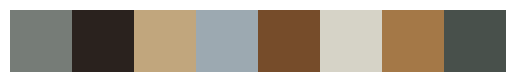

In [47]:
paleta_cores(paleta_Impressionism)

In [81]:
salva_modelo(kmeans_Impressionism,'Early_Impressionism')

## Post-Impressionism

In [82]:
#Cria o array com os dados das imagens
dados_Post_Impressionism  = fnc_cria_dataframe("C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens_por_genero\\Post-Impressionism")

In [83]:
kmeans_Post_Impressionism, paleta_Post_Impressionism = treina_modelo_paleta(dados= dados_Post_Impressionism,n_clusters=5)

Paleta de Cores (Hex): ['#819390', '#29251d', '#d4d1bb', '#685d3e', '#be9c50']


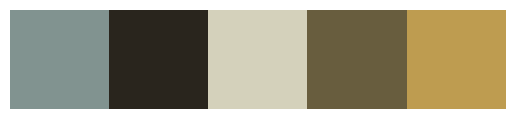

In [84]:
paleta_cores(paleta_Post_Impressionism)

In [ ]:
salva_modelo(kmeans_Post_Impressionism,'Early_Post_Impressionism')

In [41]:
with open("C:\\Users\\mavia\\Documents\\ML-PROJECT\\Modelos\\Early_Post_Impressionism.pkl",'rb') as arquivo:
    kmeans_Post_Impressionism = pickle.load(arquivo)

## Realism

In [11]:
#Cria o array com os dados das imagens
dados_realism  = fnc_cria_dataframe("C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens_por_genero\\Realism")

In [ ]:
kmeans_realism, paleta_realism = treina_modelo_paleta(dados= dados_realism,n_clusters=5)

Paleta de Cores (Hex): ['#cecdb6', '#453528', '#a59679', '#796046', '#1c1512']


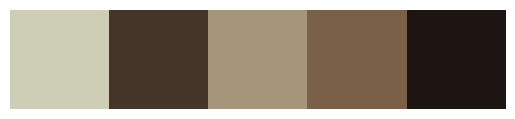

In [13]:
paleta_cores(paleta_realism)

In [14]:
salva_modelo(kmeans_realism,'realism')

## Romanticism

In [15]:
#Cria o array com os dados das imagens
dados_Romanticism  = fnc_cria_dataframe("C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens_por_genero\\Romanticism")

In [43]:
kmeans_Romanticism, paleta_Romanticism = treina_modelo_paleta(dados= dados_Romanticism,n_clusters=8)

Paleta de Cores (Hex): ['#d4c3a0', '#564337', '#261a17', '#7a786d', '#bc9b68', '#e0ded3', '#9ea29f', '#946438']


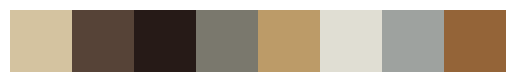

In [44]:
paleta_cores(paleta_Romanticism)

In [18]:
salva_modelo(kmeans_Romanticism,'Romanticism')

## Symbolism

In [19]:
#Cria o array com os dados das imagens
dados_Symbolism  = fnc_cria_dataframe("C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens_por_genero\\Symbolism")

In [23]:
kmeans_Symbolism, paleta_Symbolism = treina_modelo_paleta(dados= dados_Symbolism,n_clusters=8)

Paleta de Cores (Hex): ['#904c2f', '#ded9d3', '#423835', '#8e96a2', '#ceb18d', '#191619', '#62666b', '#c1834e']


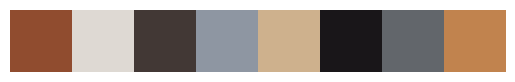

In [31]:
paleta_cores(paleta_Symbolism)

In [22]:
salva_modelo(kmeans_Symbolism,'Symbolism')

In [34]:
image = mpl.image.imread("C:\\Users\\mavia\\Documents\\ML-PROJECT\\Imagens_por_genero\\Impressionism\\Pierre-Auguste_Renoir_308.jpg")

## Salvando uma paleta

['#c3bbbb', '#5e4130', '#8c8a9d', '#85634b', '#a9a5b2', '#a98974', '#656072', '#3c2215']


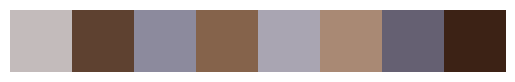

In [6]:
# Caminho da nova imagem
new_image_path = "C:\\Users\\mavia\\Documents\\Projeto\\InspirArt\\static\\images\\Claude_Monet_40.jpg"
image_name = 'claude_monet_2'
cluster_path = 'C:\\Users\\mavia\\Documents\\Projeto\\InspirArt\\static\\images_galery'
kmeans  = KMeans(n_clusters=8, init='k-means++', algorithm='elkan', n_init=1, random_state=42)

# Extração de recursos da nova imagem
new_features = extract_features_new(new_image_path)
# Verifica se a função extract_features retornou algo
if new_features is not None:
    # Previsão dos clusters para a nova imagem
    new_clusters = kmeans.fit_predict(new_features)

    # Exibe a contagem de pixels em cada cluster
    #print(pd.Series(new_clusters).value_counts())

    # Visualiza a paleta de cores para a nova imagem
    new_palette_2 = kmeans.cluster_centers_.astype(int)
    new_palette_hex = ['#%02x%02x%02x' % (r, g, b) for (r, g, b) in new_palette_2]
    plt.imshow([new_palette_2])
    print(new_palette_hex)
    plt.axis('off')
    #plt.savefig(os.path.join(cluster_path, f'imagem_clusterizada_{image_name}.png'), bbox_inches='tight', pad_inches=0)
    plt.show()